In this tutorial, we will compare different kernels (linear, polynomial, and radial basis function) for Support Vector Machines (SVMs) using a synthetic dataset.

### Tutorial: Comparing SVM Kernels

#### Step 1: Generate Synthetic Data

We'll start by generating a synthetic dataset with two classes.


In [1]:
import numpy as np
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

# Generate a synthetic moon-shaped dataset
X, y = make_moons(n_samples=200, noise=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#### Step 2: Train SVMs with Different Kernels

We'll train three SVM models with different kernels: linear, polynomial, and radial basis function (RBF).


In [2]:
from sklearn.svm import SVC

# Initialize SVM models with different kernels
svm_linear = SVC(kernel='linear', C=1.0)
svm_poly = SVC(kernel='poly', degree=3, C=1.0, gamma='auto')
svm_rbf = SVC(kernel='rbf', C=1.0, gamma='auto')

# Train the SVM models
svm_linear.fit(X_train, y_train)
svm_poly.fit(X_train, y_train)
svm_rbf.fit(X_train, y_train)


SVC(gamma='auto')

#### Step 3: Evaluate and Compare Models

We'll evaluate the models on the test set and compare their performance.


In [3]:
from sklearn.metrics import accuracy_score

# Function to evaluate and print accuracy
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy: {accuracy:.2f}')

# Evaluate the models
print("Linear Kernel:")
evaluate_model(svm_linear, X_test, y_test)

print("\nPolynomial Kernel:")
evaluate_model(svm_poly, X_test, y_test)

print("\nRBF Kernel:")
evaluate_model(svm_rbf, X_test, y_test)


Linear Kernel:
Accuracy: 0.82

Polynomial Kernel:
Accuracy: 0.80

RBF Kernel:
Accuracy: 0.93


#### Step 4: Visualize Decision Boundaries

We'll create a visualization to see how each model's decision boundary differs.

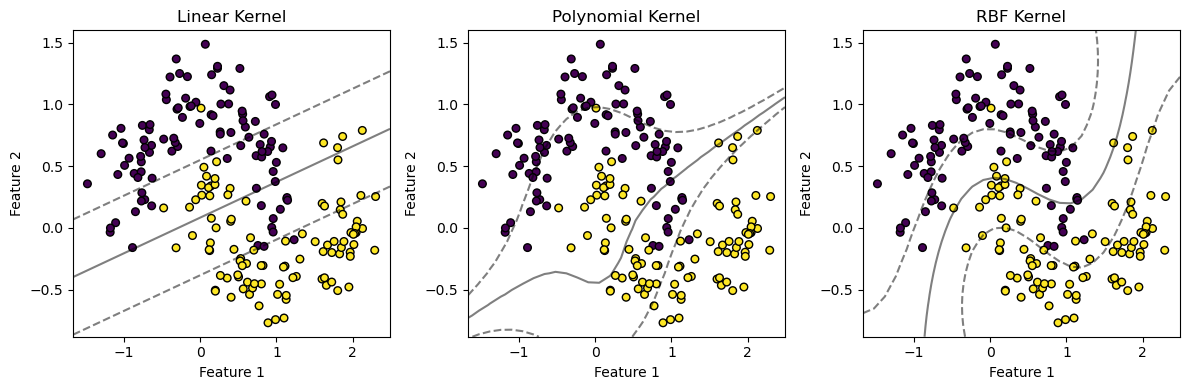

In [4]:
import matplotlib.pyplot as plt

# Function to plot decision boundaries
def plot_decision_boundary(model, X, y):
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', s=30, edgecolors='k')
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = model.decision_function(xy).reshape(XX.shape)
    
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')

# Visualize decision boundaries
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plot_decision_boundary(svm_linear, X, y)
plt.title('Linear Kernel')

plt.subplot(1, 3, 2)
plot_decision_boundary(svm_poly, X, y)
plt.title('Polynomial Kernel')

plt.subplot(1, 3, 3)
plot_decision_boundary(svm_rbf, X, y)
plt.title('RBF Kernel')

plt.tight_layout()
plt.show()

### Conclusion

In this tutorial, we compared SVM models with three different kernels: linear, polynomial, and radial basis function (RBF). We trained and evaluated the models and visualized their decision boundaries. This allows us to see how different kernels affect the model's ability to separate classes. Remember that the choice of kernel depends on the nature of the data and it may require some tuning of hyperparameters for optimal performance.